# Experimental Results

This notebook takes the output from object tracking scripts and processes and plots the results.

Also, this notebook will compare simulation results to the processed step response data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

In [2]:
ls

README.txt                              meanshift.py
basic_color_tracking.py*                object_tracking_test.ipynb
cam_data_step_video.txt                 opencv_test.ipynb
experimental_results.ipynb              range-detector-orig.py
experimental_results_no_simulink.ipynb  simulink.mat
frame1.png                              simulink_results.pdf
frame2.png                              step_video.MOV
frame_test_values.txt                   values test.txt
frame_vid.png                           values.txt
meanshift.ipynb                         wn_zeta_test_video/


## Object Tracking Proof of Concept

Try plotting the results from running 'basic_color_tracking.py' with the 'step video.mov' file.

In [3]:
with open('cam_data_step_video.txt') as f:
    data = np.loadtxt(f, delimiter=',')

data.shape

(394, 3)

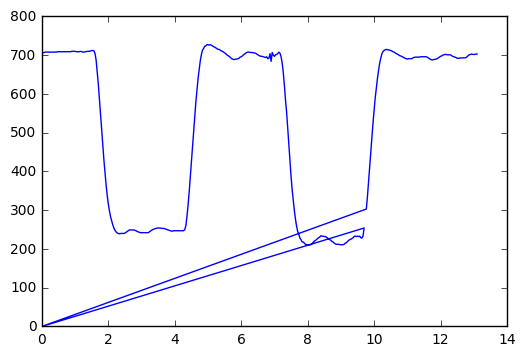

In [4]:
# data is transposed and plotted
data = data.transpose()
plt.plot(data[0], data[1])

From above, the object tracking failed briefly around 10 seconds. We will have to do several trials and extract one good continuous measurement.

# Experimental Object Tracking Data

Same 5 trials

1. $\zeta$ = 1, $\omega_n$ = 2 rad/s

2. $\zeta$ = 0.3, $\omega_n$ = 2 rad/s

3. $\zeta$ = 0.707, $\omega_n$ = 2 rad/s

4. $\zeta$ = 0.707, $\omega_n$ = 4 rad/s

5. $\zeta$ = 0.707, $\omega_n$ = 7 rad/s

In [5]:
cd wn_zeta_test_video/

/Users/mitchallain/Development/Python/jupyter notebooks/MEEN 667/openCV/wn_zeta_test_video


In [6]:
ls

IMG_1360.MOV             exp_results2.pdf         trial_1_data.txt
IMG_1361.MOV             exp_results3.pdf         trial_2_data.txt
IMG_1362.MOV             frame_vid1.png           trial_3_data.txt
IMG_1363.MOV             frame_vid2.png           trial_4_data.txt
IMG_1364.MOV             frame_vid3.png           trial_5_data.txt
Icon?                    frame_vid4.png           values_vid1.txt
basic_color_tracking.py* frame_vid5.png
exp_results.pdf          simulink_results2.pdf


In [7]:
trial_data = []

for i in range(1, 6):
    with open('trial_' + str(i) + '_data.txt') as f:
        trial_data.append(np.loadtxt(f, delimiter=','))

# for trial in trial_data:
#     trial = trial.transpose()
t1, t2, t3, t4, t5 = [t.transpose() for t in trial_data]

## Trimming and Scaling

Write some functions to make data processing easier.

In [8]:
# useful function to find index of nearest value in array (i.e. time)
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

def trim_scale(trial_data, start_time, end_time, displacement, 
               invert=False):
    '''This function scales position data and normalizes both
       the time and position to match step response simulations.
       
       Also, can invert data with option boolean keyword arg invert'''
    st_idx = find_nearest(trial_data[0], start_time)
    end_idx = find_nearest(trial_data[0], end_time)
    trimmed = np.array([trial_data[0][st_idx:end_idx+1],
                        trial_data[1][st_idx:end_idx+1]])
    trimmed[0] = trimmed[0] - trimmed[0][0]

    # (end_pix - start_pix) / actual_displacement is a scaling factor
    scaling_factor = (trimmed[1][-1] - trimmed[1][0]) / displacement
    scaled = np.array([trimmed[0], 
                       (trimmed[1]-trimmed[1][0]) / scaling_factor])
    return scaled

## Apply trimming and scaling to each dataset

Plot original and processed data.

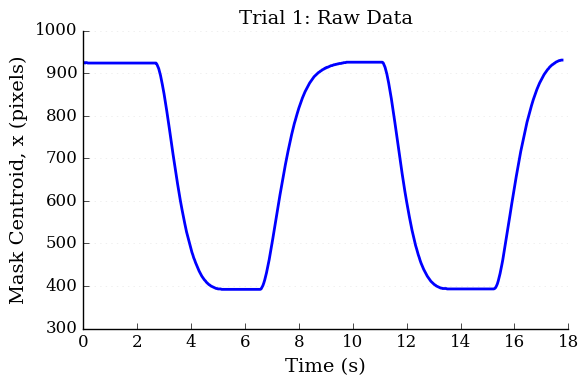

In [9]:

fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=12)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on a horizontal grid and set appropriate linestyle and color
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)
ax.set_axisbelow(True)

# Skip title in favor of fig caption

# Define the X and Y axis labels
plt.plot(t1[0], t1[1], lw=2)
plt.title('Trial 1: Raw Data', family='serif', fontsize=14)
plt.xlabel('Time (s)', family='serif', fontsize=14)
plt.ylabel('Mask Centroid, x (pixels)', family='serif', fontsize=14)

plt.tight_layout()
plt.savefig('sample_trial_1.pdf', dpi=600)
plt.show()



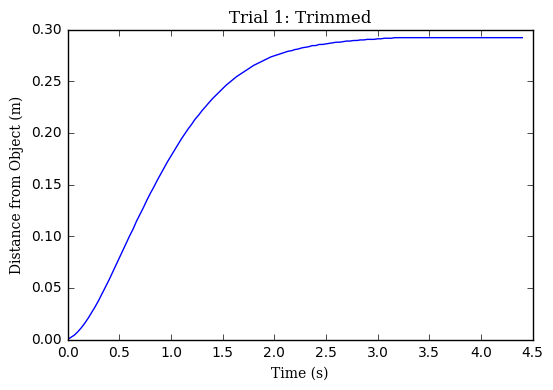

In [10]:
t1t = trim_scale(t1, 6.6, 11, .2921)

plt.plot(t1t[0], t1t[1])
plt.ylabel('Distance from Object (m)', family='serif')
plt.title('Trial 1: Trimmed', family='serif')
plt.xlabel('Time (s)', family='serif')

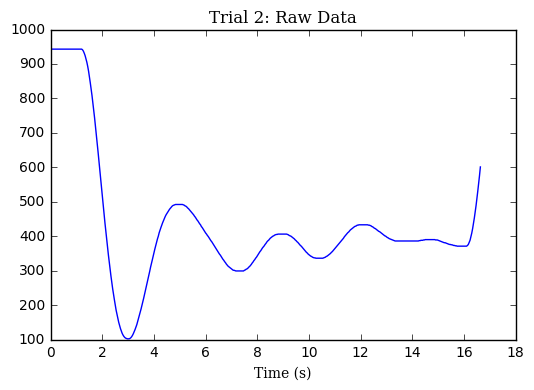

In [11]:
plt.plot(t2[0][:500], t2[1][:500])
plt.title('Trial 2: Raw Data', family='serif')
plt.xlabel('Time (s)', family='serif')

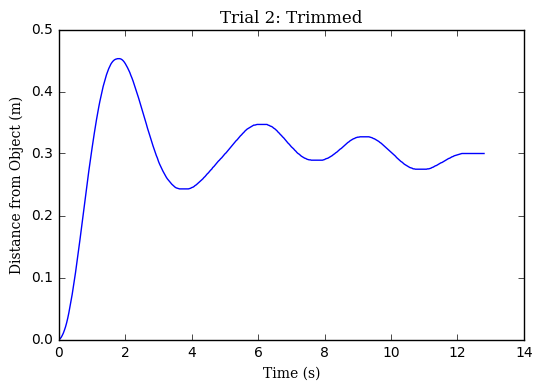

In [79]:
t2t = trim_scale(t2, 1.2, 14, .3)

plt.plot(t2t[0], t2t[1])
plt.ylabel('Distance from Object (m)', family='serif')
plt.title('Trial 2: Trimmed', family='serif')
plt.xlabel('Time (s)', family='serif')

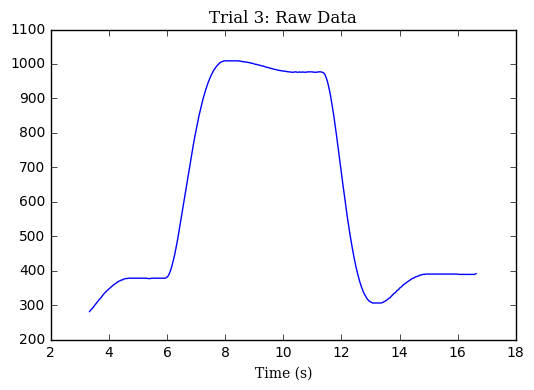

In [82]:
plt.plot(t3[0][100:500], t3[1][100:500])
plt.title('Trial 3: Raw Data', family='serif')
plt.xlabel('Time (s)', family='serif')

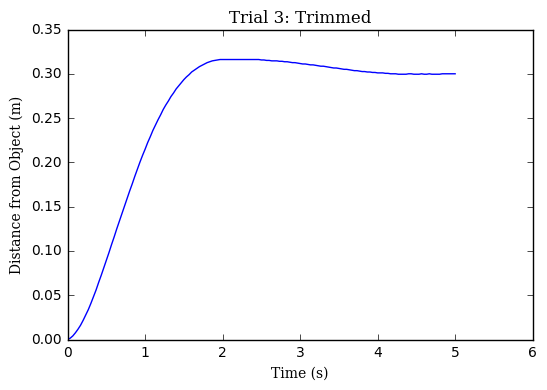

In [83]:
t3t = trim_scale(t3, 6, 11, .3)

plt.plot(t3t[0], t3t[1])
plt.ylabel('Distance from Object (m)', family='serif')
plt.title('Trial 3: Trimmed', family='serif')
plt.xlabel('Time (s)', family='serif')

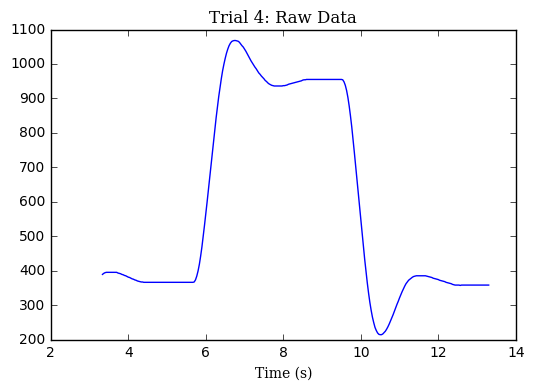

In [85]:
plt.plot(t4[0][100:400], t4[1][100:400])
plt.title('Trial 4: Raw Data', family='serif')
plt.xlabel('Time (s)', family='serif')

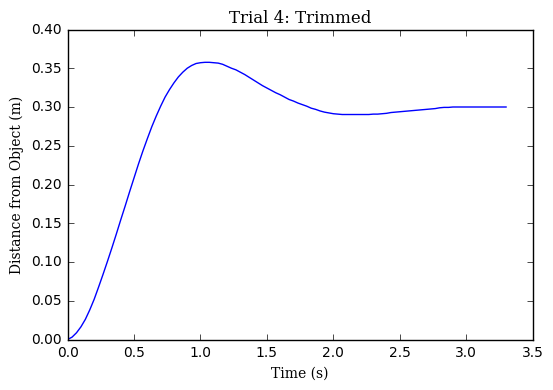

In [86]:
t4t = trim_scale(t4, 5.7, 9, .3)

plt.plot(t4t[0], t4t[1])
plt.ylabel('Distance from Object (m)', family='serif')
plt.title('Trial 4: Trimmed', family='serif')
plt.xlabel('Time (s)', family='serif')

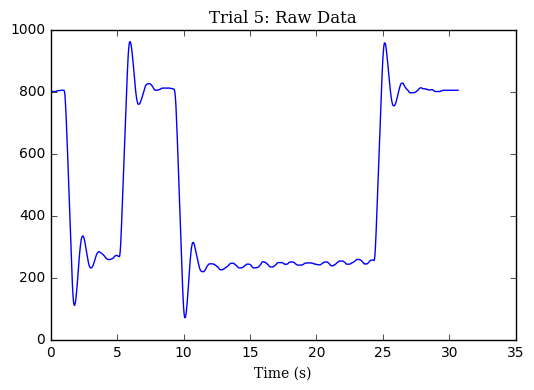

In [87]:
plt.plot(t5[0], t5[1])
plt.title('Trial 5: Raw Data', family='serif')
plt.xlabel('Time (s)', family='serif')

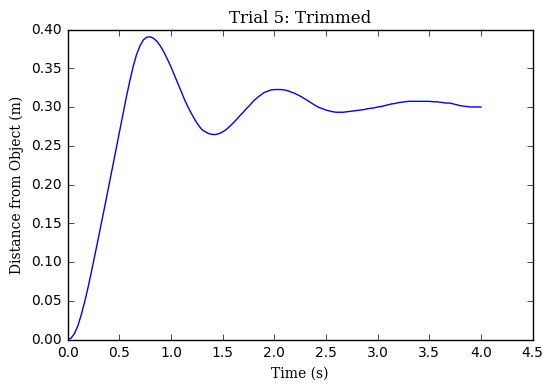

In [88]:
t5t = trim_scale(t5, 1, 5, .3)

plt.plot(t5t[0], t5t[1])
plt.ylabel('Distance from Object (m)', family='serif')
plt.title('Trial 5: Trimmed', family='serif')
plt.xlabel('Time (s)', family='serif')

# Plotting Experimental Results

Plot all the trials on the same axes.

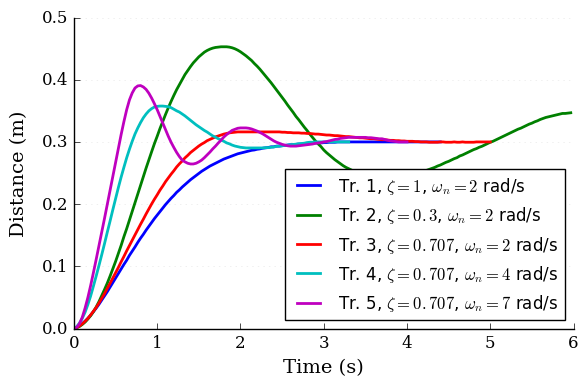

In [99]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=12)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on a horizontal grid and set appropriate linestyle and color
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)
ax.set_axisbelow(True)

# Skip title in favor of fig caption

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=14, labelpad=5)
plt.ylabel('Distance (m)', family='serif', fontsize=14, labelpad=10)

plt.plot(t1t[0], t1t[1], ls='-', lw=2, 
         label=r'Tr. 1, $\zeta = 1$, $\omega_n = 2$ rad/s')
plt.plot(t2t[0][:180], t2t[1][:180], ls='-', lw=2, 
         label=r'Tr. 2, $\zeta = 0.3$, $\omega_n = 2$ rad/s')
plt.plot(t3t[0], t3t[1], ls='-', lw=2, 
         label=r'Tr. 3, $\zeta = 0.707$, $\omega_n = 2$ rad/s')
plt.plot(t4t[0], t4t[1], ls='-', lw=2, 
         label=r'Tr. 4, $\zeta = 0.707$, $\omega_n = 4$ rad/s')
plt.plot(t5t[0], t5t[1], ls='-', lw=2, 
         label=r'Tr. 5, $\zeta = 0.707$, $\omega_n = 7$ rad/s')

plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('exp_results2.pdf', dpi=600)
plt.show()

